Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       2.0
           1       0.00      1.00      0.00       0.0

    accuracy                           1.00       2.0
   macro avg       0.50      0.50      0.00       2.0
weighted avg       1.00      0.00      0.00       2.0

Confusion Matrix:
 [[0 2]
 [0 0]]


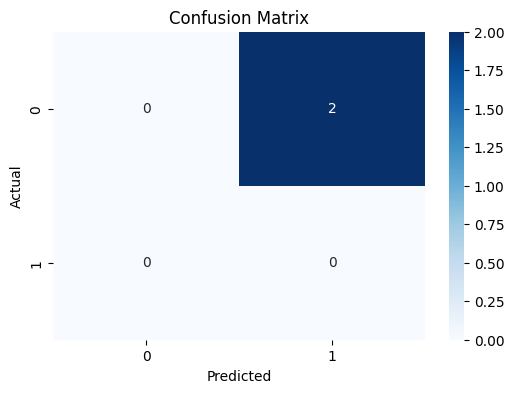

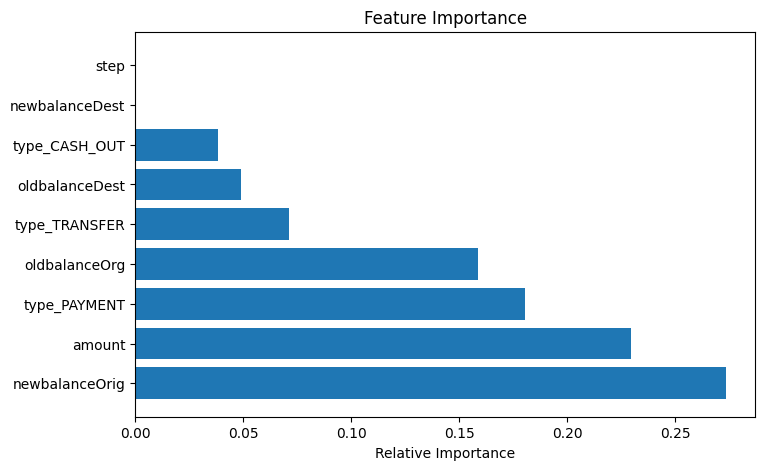

Enter step (time in hours): 5
Enter type of transaction (PAYMENT/TRANSFER/CASH_OUT/etc.): PAYMENT
Enter amount: 7000
Enter old balance of the origin: 10000
Enter new balance of the origin: 17000
Enter old balance of the destination: 10000
Enter new balance of the destination: 17000

Fraudulent Transaction Prediction:  Yes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sample dataset based on the provided tables
data = {
    'step': [1, 1, 1, 1, 1],
    'type': ['PAYMENT', 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'PAYMENT'],
    'amount': [9839.64, 1864.28, 181.00, 181.00, 11668.14],
    'nameOrig': ['C1231006815', 'C1666544295', 'C1305486145', 'C840083671', 'C2048537720'],
    'oldbalanceOrg': [170136.00, 21249.00, 181.00, 181.00, 41554.00],
    'newbalanceOrig': [160296.36, 19384.72, 0.00, 0.00, 29885.86],
    'nameDest': ['M1979787155', 'M2044282225', 'C553264065', 'C38997010', 'M1230701703'],
    'oldbalanceDest': [0.00, 0.00, 0.00, 21182.00, 0.00],
    'newbalanceDest': [0.00, 0.00, 0.00, 0.00, 0.00],
    'isFraud': [0, 0, 1, 1, 0],
    'isFlaggedFraud': [0, 0, 0, 0, 0]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Features and labels
X = df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline for numeric and categorical features
numeric_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical_features = ['type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Random Forest Classifier with class balancing
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Training the model
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# --- Graphical Representations ---

# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plotting feature importance
model = clf.named_steps['classifier']
if hasattr(model, 'feature_importances_'):
    feature_names = numeric_features + list(clf.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
    importances = model.feature_importances_
    indices = importances.argsort()[::-1]

    plt.figure(figsize=(8,5))
    plt.title("Feature Importance")
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

# --- User Input for Transaction Prediction ---

def check_fraud_prediction():
    step = int(input("Enter step (time in hours): "))
    transaction_type = input("Enter type of transaction (PAYMENT/TRANSFER/CASH_OUT/etc.): ")
    amount = float(input("Enter amount: "))
    oldbalanceOrg = float(input("Enter old balance of the origin: "))
    newbalanceOrig = float(input("Enter new balance of the origin: "))
    oldbalanceDest = float(input("Enter old balance of the destination: "))
    newbalanceDest = float(input("Enter new balance of the destination: "))

    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'step': [step],
        'type': [transaction_type],
        'amount': [amount],
        'oldbalanceOrg': [oldbalanceOrg],
        'newbalanceOrig': [newbalanceOrig],
        'oldbalanceDest': [oldbalanceDest],
        'newbalanceDest': [newbalanceDest]
    })

    # Make a prediction
    prediction = clf.predict(input_data)
    print("\nFraudulent Transaction Prediction: ", "Yes" if prediction[0] == 1 else "No")

# Call the function to predict based on user input
check_fraud_prediction()
